In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Create dataframe from excel file
df = pd.read_excel('golden_standard.xlsx', sheet_name='Annotation R2')
df.head()

,item/name,item/artist,mood D,mood B,mood S,mood K,Average mood,Unnamed: 7,Fleiss Kappa,positive,neutral,negative,Unnamed: 12,SUM SQ,sum sq/(4*3)
0,​abcdefu,GAYLE,negative,negative,negative,negative,-1.00,negative,NaN,0,0.0,4.0,NaN,12,1.0
1,22,Taylor Swift,positive,positive,positive,positive,1.00,positive,NaN,4,0.0,0.0,NaN,12,1.0
2,A Thousand Miles,Vanessa Carlton,negative,negative,negative,negative,-1.00,negative,NaN,0,0.0,4.0,NaN,12,1.0
3,All Time Low,Jon Bellion(?)/The Wanted,negative,negative,negative,negative,-1.00,negative,NaN,0,0.0,4.0,NaN,12,1.0
4,All You Wanted,Michelle Branch,negative,negative,neutral,negative,-0.75,negative,NaN,0,1.0,3.0,NaN,6,0.5


In [4]:
# Drop unnecessary columns
try:
    df.drop(columns=['Unnamed: 7', 'Fleiss Kappa', 'Unnamed: 12', 'SUM SQ', 'sum sq/(4*3)'], inplace=True)
except KeyError:
    pass
df.head()

,item/name,item/artist,mood D,mood B,mood S,mood K,Average mood,positive,neutral,negative
0,​abcdefu,GAYLE,negative,negative,negative,negative,-1.00,0,0.0,4.0
1,22,Taylor Swift,positive,positive,positive,positive,1.00,4,0.0,0.0
2,A Thousand Miles,Vanessa Carlton,negative,negative,negative,negative,-1.00,0,0.0,4.0
3,All Time Low,Jon Bellion(?)/The Wanted,negative,negative,negative,negative,-1.00,0,0.0,4.0
4,All You Wanted,Michelle Branch,negative,negative,neutral,negative,-0.75,0,1.0,3.0


In [5]:
# Rename columns
df.rename(columns={
                    'item/name': 'song', 
                    'item/artist': 'artist', 
                    'mood D': 'dagmara', 
                    'mood B': 'barbara', 
                    'mood S': 'szymon', 
                    'mood K': 'kamila', 
                    'Average mood': 'avg_mood'
                }, inplace=True)
df.head()


,song,artist,dagmara,barbara,szymon,kamila,avg_mood,positive,neutral,negative
0,​abcdefu,GAYLE,negative,negative,negative,negative,-1.00,0,0.0,4.0
1,22,Taylor Swift,positive,positive,positive,positive,1.00,4,0.0,0.0
2,A Thousand Miles,Vanessa Carlton,negative,negative,negative,negative,-1.00,0,0.0,4.0
3,All Time Low,Jon Bellion(?)/The Wanted,negative,negative,negative,negative,-1.00,0,0.0,4.0
4,All You Wanted,Michelle Branch,negative,negative,neutral,negative,-0.75,0,1.0,3.0


In [6]:
# Identify the end of sheet and cut dataframe
df = df[:69]
df.tail(20)

,song,artist,dagmara,barbara,szymon,kamila,avg_mood,positive,neutral,negative
49,Rise,Jonas Blue,positive,positive,positive,positive,1.00,4,0.0,0.0
50,Say My Name,Destiny's Child,negative,neutral,positive,negative,-0.25,1,1.0,2.0
51,Shape of You,Ed Sheeran,positive,positive,positive,positive,1.00,4,0.0,0.0
52,Sleep All Day,Jason Mraz,negative,negative,negative,negative,-1.00,0,0.0,4.0
53,Somebody to You,The Vamps,positive,positive,positive,positive,1.00,4,0.0,0.0
54,Stay,SafetySuit/Rihanna(?),negative,negative,negative,negative,-1.00,0,0.0,4.0
55,Story of My Life,One Direction,negative,negative,negative,negative,-1.00,0,0.0,4.0
56,Stressed Out,​twenty one pilots,negative,negative,negative,negative,-1.00,0,0.0,4.0
57,Sugar,Maroon 5,negative,positive,negative,negative,-0.50,1,0.0,3.0
58,The Reason,Hoobastank,positive,positive,neutral,positive,0.75,3,1.0,0.0


In [7]:
# Convert values in 'neutral' and 'negative' to integers
df.neutral = df.neutral.astype(int)
df.negative = df.negative.astype(int)
df.head(10)

,song,artist,dagmara,barbara,szymon,kamila,avg_mood,positive,neutral,negative
0,​abcdefu,GAYLE,negative,negative,negative,negative,-1.00,0,0,4
1,22,Taylor Swift,positive,positive,positive,positive,1.00,4,0,0
2,A Thousand Miles,Vanessa Carlton,negative,negative,negative,negative,-1.00,0,0,4
3,All Time Low,Jon Bellion(?)/The Wanted,negative,negative,negative,negative,-1.00,0,0,4
4,All You Wanted,Michelle Branch,negative,negative,neutral,negative,-0.75,0,1,3
5,Amnesia,5 Seconds of Summer,negative,negative,negative,negative,-1.00,0,0,4
6,Applause,Lady Gaga,positive,positive,neutral,positive,0.75,3,1,0
7,Astronaut in the Ocean,Masked Wolf,negative,negative,neutral,negative,-0.75,0,1,3
8,Back to December,Taylor Swift,negative,neutral,negative,negative,-0.75,0,1,3
9,Beautiful,Christina Aguilera,positive,positive,negative,positive,0.50,3,0,1


In [30]:
# Create a dataframe for illustrating the hardest songs to annotate manually 
df["disagreement"] = df.positive * df.negative
sorted_df = df.sort_values(by='disagreement', ascending=False)
sorted_df.head(4)

,song,artist,dagmara,barbara,szymon,kamila,avg_mood,positive,neutral,negative,disagreement
34,Let Me Love You,DJ Snake,positive,negative,negative,positive,0.0,2,0,2,4
10,Believing,The Calling,positive,negative,positive,negative,0.0,2,0,2,4
31,I'm Like a Bird,Nelly Furtado,positive,positive,negative,positive,0.5,3,0,1,3
57,Sugar,Maroon 5,negative,positive,negative,negative,-0.5,1,0,3,3


In [31]:
# Map annotations to their values
four_songs = [sorted_df[['dagmara', 'barbara', 'szymon', 'kamila']].iloc[i].values.tolist() for i in range(4)]
ratings = [list(map(lambda rating: 1 if rating == "positive" else -1, song)) for song in four_songs]
ratings

[[1, -1, -1, 1], [1, -1, 1, -1], [1, 1, -1, 1], [-1, 1, -1, -1]]

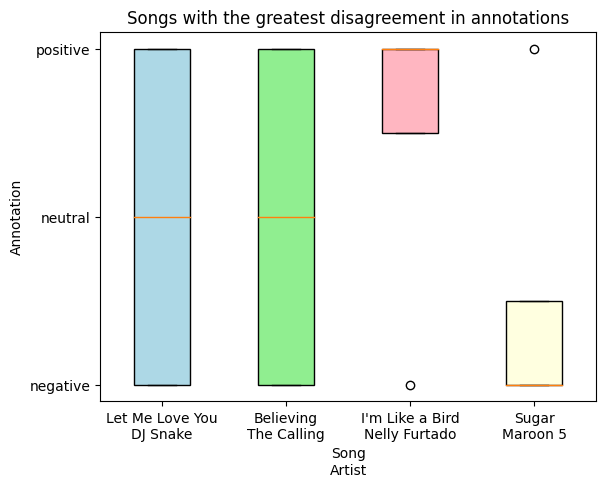

In [32]:
# Visualise the songs with greatest disagreement in annotations
boxplot = plt.boxplot(ratings, patch_artist=True)
plt.xticks(range(1, len(ratings) + 1),  labels=sorted_df[:4]["song"]+"\n"+sorted_df[:4]["artist"], rotation=0)
plt.yticks([1, 0, -1], ['positive', 'neutral', 'negative'])
plt.xlabel('Song\nArtist')
plt.ylabel('Annotation')
plt.title('Songs with the greatest disagreement in annotations')
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
plt.show()